In [2]:
import numpy as np
import xarray as xr
import gzip
import os.path as op
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
years = range(2003,2019)
# minl = np.cumsum(np.array([1,31,29,31,30,31,30,31,31,30,31,30]))
# minr = np.cumsum(np.array([1,31,28,31,30,31,30,31,31,30,31,30]))
days = np.arange(1,365,8)
cbpm = np.ones((len(years)*len(days),1080,2160))*np.nan

print(cbpm.shape)

(736, 1080, 2160)


In [14]:
days

array([  1,   9,  17,  25,  33,  41,  49,  57,  65,  73,  81,  89,  97,
       105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201,
       209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305,
       313, 321, 329, 337, 345, 353, 361])

In [7]:
ddir = '/swot/SUM05/takaya/MODIS/CbPM/8day/'

In [10]:
fname = op.join(ddir,'carbon.2003001.hdf')
# with gzip.open(url, 'rb') as f:
#     ds = f.read()
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:  (fakeDim0: 1080, fakeDim1: 2160)
Dimensions without coordinates: fakeDim0, fakeDim1
Data variables:
    carbon   (fakeDim0, fakeDim1) float32 ...
Attributes:
    Start Time:         1041408000
    Stop Time:          1042099199
    Start Time String:  01/01/2003 00:00:00
    Stop Time String:   01/08/2003 23:59:59

In [16]:
i = 0
for year in years:
#     if year % 4 == 0:
#         for day in minl:
#             fname = op.join(ddir, 'carbon.%4d%03d.hdf' % (year, day))
#             ds = xr.open_dataset(fname)
#             cbpm[i] = ds.carbon.data
#             i += 1
#     else:
#         for day in minr:
    for day in days:
        fname = op.join(ddir, 'carbon.%4d%03d.hdf' % (year,day))
        ds = xr.open_dataset(fname)
        cbpm[i] = ds.carbon.data
        i += 1

In [17]:
cbpm = xr.DataArray(np.ma.masked_values(cbpm,-9999.), dims=['iTIME','lat','lon'],
                   coords={'iTIME':range(len(years)*len(days)),'lat':np.linspace(90.,-90.,1080),
                          'lon':np.arange(-180,180.,360./2160),
                          'day':('iTIME',np.tile(days,len(years)))},
                   attrs={'unit':'[mg m-3]'}
                   )
cbpm

<xarray.DataArray (iTIME: 736, lat: 1080, lon: 2160)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * iTIME    (iTIME) int64 0 1 2 3 4 5 6 7 8 ... 728 729 730 731 732 733 734 735
  * lat      (lat) float64 90.0 89.83 89.67 89.5 ... -89.5 -89.67 -89.83 -90.0
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.5 179.7 179.8
    day      (iTIME) int64 1 9 17 25 33 41 49 57 ... 313 321 32

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


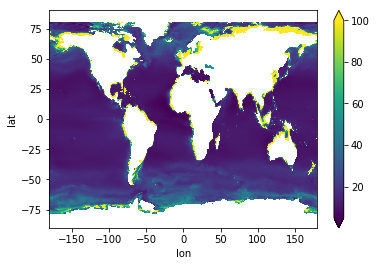

In [18]:
cbpm.mean('iTIME').plot(vmin=5,vmax=1e2)

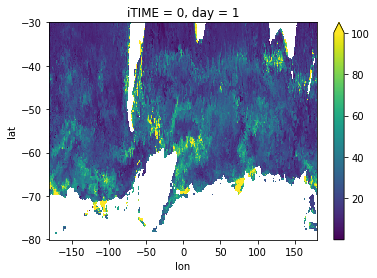

In [19]:
cbpm_SO = cbpm.sel(lat=slice(-30,-80))
cbpm_SO[0].plot(vmax=1e2)
cbpm_SO.attrs = {'unit':'[mg m-3]'}
cbpm_SO.to_dataset(name='carbon').to_netcdf(op.join(ddir,'CbPM-8day_30-80S.nc'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


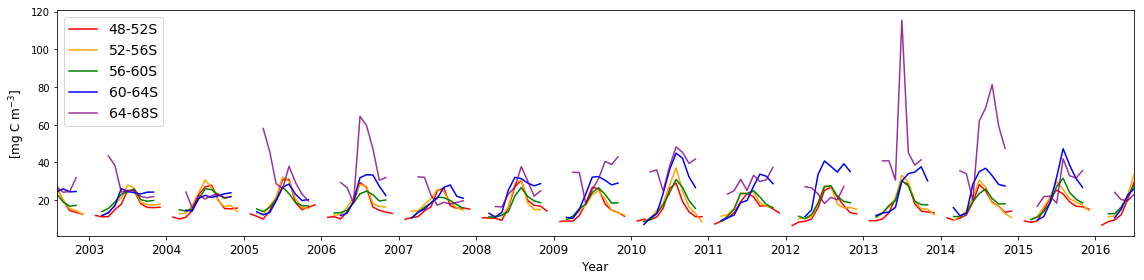

In [10]:
cbpm_Ker = cbpm_SO.sel(lon=slice(100,140))
colors = ['r','orange','g','b','purple']

ticks = np.zeros(len(years))
for i in range(len(years)):
    ticks[i] = 5 + 12*i

fig, ax = plt.subplots(figsize=(16,4))
fig.set_tight_layout(True)
cbpm_Ker.sel(lat=slice(-48,-52)).mean(['lat','lon']).plot(ax=ax, label=r'48-52S', color=colors[0])
cbpm_Ker.sel(lat=slice(-52,-56)).mean(['lat','lon']).plot(ax=ax, label=r'52-56S', color=colors[1])
cbpm_Ker.sel(lat=slice(-56,-60)).mean(['lat','lon']).plot(ax=ax, label=r'56-60S', color=colors[2])
cbpm_Ker.sel(lat=slice(-60,-64)).mean(['lat','lon']).plot(ax=ax, label=r'60-64S', color=colors[3])
cbpm_Ker.sel(lat=slice(-64,-68)).mean(['lat','lon']).plot(ax=ax, label=r'64-68S', color=colors[4], alpha=0.8)
ax.set_xticks(ticks)
ax.set_xticklabels(range(2003,2017), fontsize=12)
ax.set_xlim([0,12*len(years)-1])
ax.set_xlabel(r'Year', fontsize=12)
ax.set_ylabel(r'[mg C m$^{-3}$]', fontsize=12)
ax.legend(loc='upper left', fontsize=14)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


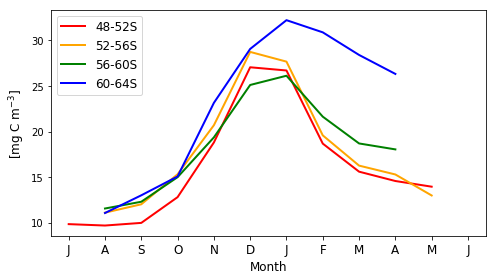

In [13]:
cbpm_Ker_mon = cbpm_Ker.groupby('month').mean(['iTIME'])

month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, ax = plt.subplots(figsize=(7,4))
fig.set_tight_layout(True)
ax.plot(range(12), cbpm_Ker_mon.sel(lat=slice(-48,-52)).mean(['lat','lon']).roll(month=-6), 
        label=r'48-52S', lw=2, color=colors[0])
ax.plot(range(12), cbpm_Ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(month=-6), 
        label=r'52-56S', lw=2, color=colors[1])
ax.plot(range(12), cbpm_Ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(month=-6), 
        label=r'56-60S', lw=2, color=colors[2])
ax.plot(range(12), cbpm_Ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(month=-6), 
        label=r'60-64S', lw=2, color=colors[3])
# cbpm_Ker_mon.sel(lat=slice(-64,-68)).mean(['lat','lon']).plot(ax=ax, label=r'65-70S', lw=2, color=colors[4])
ax.set_xticks(range(12))
ax.set_xticklabels(np.roll(np.asarray(month), -6), fontsize=12)
ax.set_xlim([-.5,11.5])
ax.set_xlabel(r'Month', fontsize=12)
ax.set_ylabel(r'[mg C m$^{-3}$]', fontsize=12)
ax.legend(loc='upper left', fontsize=12)

In [13]:
cbpm_Ker_mon.sel(lat=slice(-48,-52)).mean(['lat','lon']).roll(month=-6)

<xarray.DataArray (month: 12)>
array([ 9.841727,  9.688159,  9.97847 , 12.804005, 18.803732, 27.056127,
       26.703305, 18.679382, 15.599498, 14.573823, 13.951544,       nan])
Coordinates:
  * month    (month) int64 6 7 8 9 10 11 0 1 2 3 4 5